# Goal and Purpose

Linear regression is the simplest and arguably most well-known form of machine learning.

Linear regression models, as in statistics, are concerned with minimizing error and making the most accurate predictions possible. A neural network can accomplish this by iteratively updating its internal parameters (weights) via a gradient descent algorithm. The Youtube educator 3B1B has a [great visualization](https://www.youtube.com/watch?v=IHZwWFHWa-w) of gradient descent in the context of machine learning models.

In this notebook, I will develop a simple single-layer model to "learn" how to predict the outcome of a linear function of the form y=mx+b. This excersize may seem trivial or unecessary ("I can produce a list of solutions for a linear function and plot it with a few lines of code, why do I need a neural network to try and learn how to do the same thing?") but this will act as a backbone to build more complex neural networks for much **much** more complicated functions.

In [1]:
import numpy as np

## Simplest neural net
A neural network can be thought of as a function: input, transformation, and output. Therefore, in its most simple representation, a neural network can take a single input, produce an output, and by comparing that output with the known result, can update its internals to better approach the correct output value.

![simplest_NN.png](./fig/simplest_NN.png)

Here, x is some input number, the input is transformed via our neural network function which has parameters W and b (weight and bias). These parameters are subject to change based on how erroneous the network's output $\hat{y}$ is compared to the actual value we'd expect from input x.

The simple neural network has the following steps:
1. Initialize training input `x_train` and output `y_train`. The output here is the expected correct answer.
2. Initialize network parameters `W` and `b` . Here the weight array must correspond to the number of inputs. Since we only feed in one input at a time for now, the weights and bias arrays will have shape (1,1). The weight is initialized to a small random number.
3. Define our `cost` function. The "cost" can be thought of as the error between the expected output and our network's output. "Cost" and "Loss" are similar, though I believe the Loss function is the averaged error when considering a multitude of simultaneous inputs. We'll showcase this later, for now, each error calculation is refered to as the cost.
4. Calculate the components of the gradient of the `cost` function. In this case: $\frac{\delta W}{\delta C}$ and $\frac{\delta b}{\delta C}$.
5. Update the network parameters by reducing by a scaled amount of the gradient components. This is *gradient descent*. 
6. Repeat this process any number of times, called *epochs*. Return the parameters `W` and `b`. 
7. Use the model's updated parameters on *test data* to determine how accurate the trained model is.

In [81]:
# This is the function we want to have our neural network learn to model:
# y = 5x + 3
def F(x):
    f = 5.*x + 3.
    return f

# 1. initialize x_train, y_train
x_train=np.array([2.]).reshape(1,1)
y_train=F(x_train)

# 2. initialize network parameters
W = np.random.randn(1,1)*0.01
b = np.zeros(1).reshape(1,1)

# Setup an arbitrary function of the form that we are interested in
# This is also called the activation function of the neuron.
def P(W, b, x):
    f = np.dot(W.T,x) + b
    return f

# 3. Define cost function
def C(W,b,x,y):
    cost = (y-P(W,b,x))**2
    return cost

# 4,5,6. Gradient descent, update parameters, repeat
def model(W,b,x,y,epochs=5, learning_rate=0.05):
    for e in range(epochs):
        error=C(W,b,x,y)
        dw = 2.*(y-P(W,b,x))*(-1.0*x)
        db = -2.*(y-P(W,b,x))
        W -= dw*learning_rate
        b -= db*learning_rate
    return W,b
W,b = model(W,b,x_train,y_train,epochs=5,learning_rate=0.05)

# 7. Determine model's accuracy
x_test = np.array([5.])
y_test = F(x_test)

result = W*x_test + b
error = np.abs(result - y_test)/y_test*100
print("True equation:\ny = 5.0x + 3.0")
print("Our learned equation is:\ny = {:.2f}x + {:.2f}".format(np.mean(W),
                                                              np.mean(b)))
print("Testing for x =", x_test[0])
print("Model result, actual: {:.2f}, {:.1f}".format(np.mean(result), 
                                                    np.mean(y_test)))
print("Model error: {:.2f}%".format(error[0][0]))


True equation:
y = 5.0x + 3.0
Our learned equation is:
y = 5.03x + 2.53
Testing for x = 5.0
Model result, actual: 27.69, 28.0
Model error: 1.11%


In [76]:
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25]
x_test = np.array([10.])
y_test = F(x_test)

def get_error(W, b, x_train, y_train, epochs, lr, x_test, y_test):
    errors = []
    W = W.copy()
    b = b.copy()
    for e in epochs:
        W,b = model(W,b,x_train,y_train,epochs=e, learning_rate=lr)
        result = W*x_test + b
        error = np.abs(result - y_test)/y_test*100
        errors.append(error[0])
    return errors


error_lr_01 = get_error(W, b, x_train, y_train, epochs, 0.1, x_test, y_test)
error_lr_005 = get_error(W, b, x_train, y_train, epochs, 0.05, x_test, y_test)
error_lr_001 = get_error(W, b, x_train, y_train, epochs, 0.01, x_test, y_test)
error_lr_0005 = get_error(W, b, x_train, y_train, epochs, 0.005, x_test, y_test)
error_lr_0001 = get_error(W, b, x_train, y_train, epochs, 0.001, x_test, y_test)

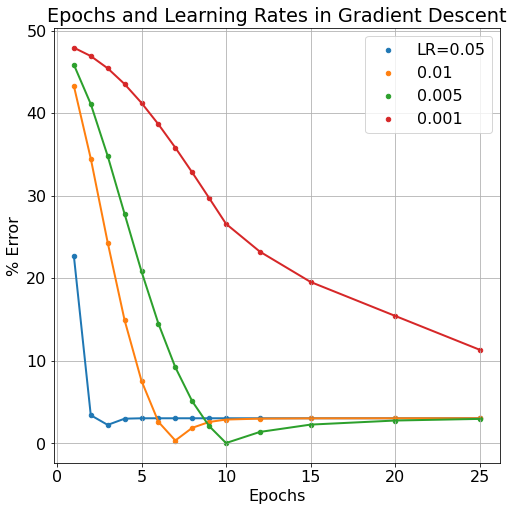

In [77]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})


plt.figure(figsize=(8,8))
lw=2
s=20
#plt.plot(epochs, error_lr_01, lw=lw)
#plt.scatter(epochs, error_lr_01, s=s, label='LR=0.1')

plt.plot(epochs, error_lr_005, lw=lw)
plt.scatter(epochs, error_lr_005, s=s, label='LR=0.05')

plt.plot(epochs, error_lr_001, lw=lw)
plt.scatter(epochs, error_lr_001, s=s, label='0.01')

plt.plot(epochs, error_lr_0005, lw=lw)
plt.scatter(epochs, error_lr_0005, s=s, label='0.005')

plt.plot(epochs, error_lr_0001, lw=lw)
plt.scatter(epochs, error_lr_0001, s=s, label='0.001')

plt.xlabel('Epochs')
plt.ylabel('% Error')
plt.title('Epochs and Learning Rates in Gradient Descent')
plt.grid()
plt.legend()
plt.show()

In [ ]:
#x_train=np.arange(0,5)
#y_train=F(x_train)

# for e in range(5):
#     for i,x in enumerate(x_train):
#         cost = C(W,b,x,y_train[i])
#         dw = 2.*(y_train[i]-P(W,b,x))*(-1.0*x)
#         db = -2.*(y_train[i]-P(W,b,x))
#         W-=dw*0.05
#         b-=db*0.05
#         print(cost)
#         print(W,b)